# Part A: Data Cleaning & Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn import linear_model

In [2]:
df = pd.read_csv('bottle.csv')

C:\Users\Gokturk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(864863, 74)

In [4]:
df1=df[['T_degC', 'Salnty', 'STheta'] ]

In [5]:
df1.head()

,T_degC,Salnty,STheta
0,10.50,33.440,25.649
1,10.46,33.440,25.656
2,10.46,33.437,25.654
3,10.45,33.420,25.643
4,10.45,33.421,25.643


In [6]:
df2 = df1.dropna()

In [7]:
df2.shape

(812174, 3)

Text(0,0.5,'T_degC')

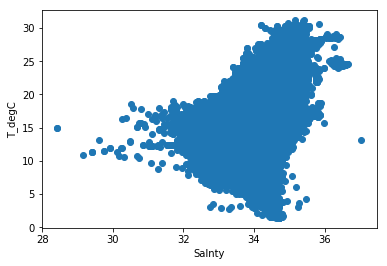

In [8]:
plt.scatter(df2.Salnty,df2.T_degC)
plt.xlabel('Salnty')
plt.ylabel('T_degC')

Text(0,0.5,'T_degC')

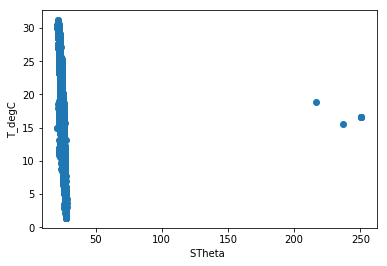

In [9]:
plt.scatter(df2.STheta,df2.T_degC)
plt.xlabel('STheta ')
plt.ylabel('T_degC')

C:\Users\Gokturk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


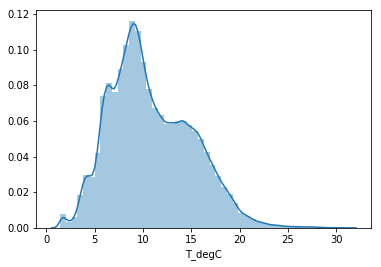

In [10]:
sns.distplot(df2.T_degC)

In [11]:
#filtering outliers
df2.STheta[df2.STheta>50]

847549    216.5753
847558    237.1793
852221    250.7840
852222    250.7840
852223    250.7840
852224    250.7840
Name: STheta, dtype: float64

In [12]:
df2.loc[[847549,847558,852221,852222,852223,852224]]
#rows which have outliers STheat values

,T_degC,Salnty,STheta
847549,18.893,33.0359,216.5753
847558,15.556,33.0599,237.1793
852221,16.642,33.1288,250.7840
852222,16.642,33.1288,250.7840
852223,16.642,33.1288,250.7840
852224,16.642,33.1288,250.7840


In [13]:
df3 = df2.drop([847549,847558,852221,852222,852223,852224])

In [14]:
df3.shape

(812168, 3)

Text(0,0.5,'T_degC')

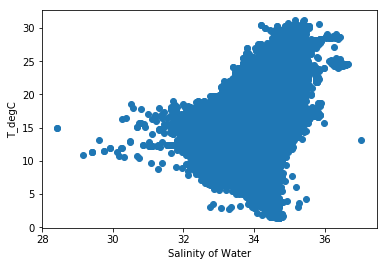

In [15]:
plt.scatter(df3.Salnty,df3.T_degC)
plt.xlabel('Salinity of Water')
plt.ylabel('T_degC')

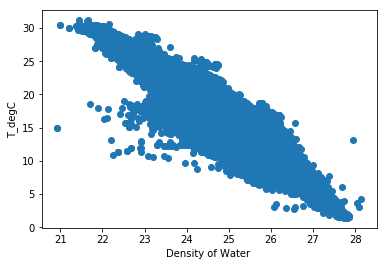

In [16]:
plt.scatter(df3.STheta,df3.T_degC)
plt.xlabel('Density of Water ')
plt.ylabel('T_degC')
plt.show()

# Part B: Train & Test Split:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df3.size

2436504

In [19]:
X = df3.drop('T_degC', axis =1)
y = df3['T_degC']

In [20]:
X.shape, y.shape

((812168, 2), (812168,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 123 )

# Part C: Linear Regression Using Normal Equation - Coded In Python

In [22]:
X_train.shape, y_train.shape

((568517, 2), (568517,))

In [23]:
X_train_new = np.c_[np.ones((len(X_train.values), 1)), X_train.values]

In [25]:
theta_best = np.dot(np.linalg.inv(np.dot(X_train_new.T,X_train_new)),np.dot(X_train_new.T,y_train.values))

In [26]:
theta_best

array([35.80163324,  3.10436857, -5.03579547])

In [27]:
X_test_new = np.c_[np.ones((len(X_test.values), 1)), X_test.values]

In [28]:
X_test.shape,X_test_new.shape

((243651, 2), (243651, 3))

In [29]:
y_predict = X_test_new.dot(theta_best)

In [30]:
y_predict

array([ 6.52146505,  9.37968405,  5.13649665, ...,  8.03382908,
       19.13781786, 12.49229864])

In [31]:
y_predict.shape

(243651,)

In [32]:
X_test_new.shape

(243651, 3)

In [33]:
#mean squared error
metrics.mean_squared_error(y_test,y_predict)

0.23256101313972596

In [34]:
#r-squared
metrics.r2_score(y_test,y_predict)

0.9869359696766346

In [35]:
#explained variance
metrics.explained_variance_score(y_test,y_predict)

0.9869359704500267

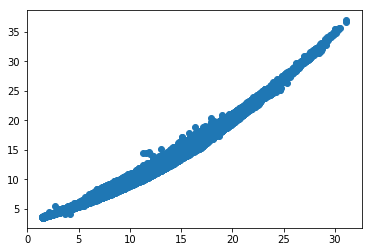

In [36]:
plt.scatter(y_test, y_predict) 

plt.show()

# Part D: Using sklearn API

In [37]:
lin_reg = linear_model.LinearRegression()

In [38]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
lin_reg.coef_

array([ 3.10436857, -5.03579547])

In [40]:
y_pred_sklearn = lin_reg.predict(X_test)

In [41]:
y_pred_sklearn

array([ 6.52146505,  9.37968405,  5.13649665, ...,  8.03382908,
       19.13781786, 12.49229864])

In [42]:
#mean squared error
metrics.mean_squared_error(y_test,y_pred_sklearn)


0.23256101314009162

In [43]:
#r-squared
metrics.r2_score(y_test,y_pred_sklearn)

0.986935969676614

In [44]:
#explained variance
metrics.explained_variance_score(y_test,y_pred_sklearn)

0.9869359704500058

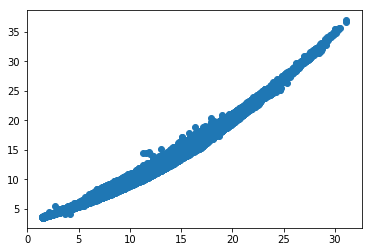

In [45]:
plt.scatter(y_test, y_pred_sklearn) 

plt.show()